<a href="https://colab.research.google.com/github/moulikatou/Ter_securite_Alimentaire_Miashs/blob/vmelancon/notebooks/ter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Projet TER analyse de données__

# IMPORTS & GLOBAL VARIABLES
----

In [82]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

path = "../TER_M1_MIASHS/donnees/" # "../TER_M1_MIASHS/donnees/"
img_path = "../notebooks/pictures/"
filename = "reduced_named_data.csv"

La cellule suivante permet de vous connecter a votre google drive, vous pourrez ainsi lire et sauver des fichiers dans ce même drive.

In [83]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# CHARGEMENT DES DONNEES
----

In [91]:
col = {
    "metadata" : ["REGION", "PROVINCE", "COMMUNE", "VILLAGE", "MEN", "YEAR"],
    "data" : ["Q1","Q2","Q3","Q4","Q5"],
    "target" : ["CSI"]
}

In [92]:
raw_data = pd.read_csv(path + filename)
raw_data = raw_data.iloc[:, 1:]
raw_data[col["metadata"][3:]] = raw_data[col["metadata"][3:]].astype(int)

raw_data

,REGION,PROVINCE,COMMUNE,VILLAGE,MEN,YEAR,Q1,Q2,Q3,Q4,Q5,CSI
0,CENTRE NORD,NAMENTENGA,BOALA,1,45,2017,0.0,0.0,0.0,0.0,0.0,0.0
1,CENTRE NORD,NAMENTENGA,BOALA,1,58,2017,3.0,2.0,4.0,2.0,0.0,17.0
2,CENTRE NORD,NAMENTENGA,BOALA,1,67,2017,0.0,0.0,0.0,0.0,0.0,0.0
3,CENTRE NORD,NAMENTENGA,BOALA,1,75,2017,0.0,0.0,0.0,0.0,0.0,0.0
4,CENTRE NORD,NAMENTENGA,BOALA,1,84,2017,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25980,SAHEL,YAGHA,BOUNDORE,14,39,2018,2.0,0.0,1.0,1.0,1.0,7.0
25981,SAHEL,YAGHA,BOUNDORE,14,43,2018,2.0,0.0,1.0,1.0,1.0,7.0
25982,SAHEL,YAGHA,BOUNDORE,14,53,2018,1.0,0.0,0.0,1.0,0.0,4.0
25983,SAHEL,YAGHA,BOUNDORE,14,68,2018,2.0,0.0,2.0,1.0,0.0,7.0


In [ ]:
d = raw_data.isna().sum()
d = d / raw_data.shape[0] * 100
print(d.to_markdown())

Peu de données manquent, nous décidons alors de les retirer pour ne pas fausser nos résultats par la suite

In [ ]:
raw_data = raw_data.dropna()

# ANALYSE DESCRIPTIVE
----
Regardons comment nos données sont formés.

## Données nulles et valeurs à 0

In [93]:
plot_data = raw_data
plot_data = plot_data.melt(id_vars=(col["metadata"] + col["target"]), var_name="QUESTION", value_name="ANSWER")

Regardons quelques informations par rapport aux données nulles ainsi qu'au questions ayant une réponse égale à 0.

In [94]:
print("PERCENTAGE CSI AT 0 : {}%".format(int(raw_data[raw_data.CSI == 0.0].shape[0] / raw_data.shape[0] * 100)))

PERCENTAGE CSI AT 0 : 59%


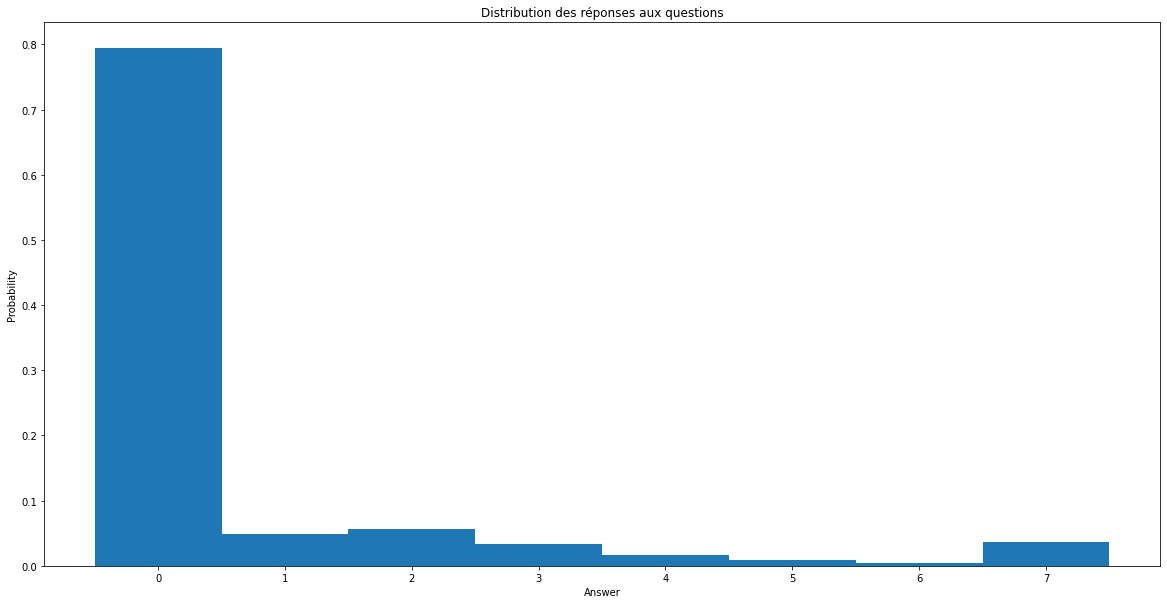

In [95]:
d = plot_data.dropna().ANSWER.astype(int)

plt.figure(figsize=(20,10))

plt.hist(d, density=True, align="left", bins=np.arange(0,9))

plt.ylabel("Probability")
plt.xlabel("Answer")
plt.title("Distribution des réponses aux questions")

plt.savefig(img_path + "answers_distribution.png")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


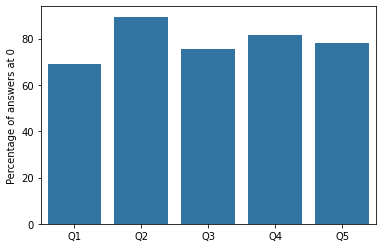

In [98]:
df = plot_data[plot_data.ANSWER == 0.0]
d = pd.Series(index=plot_data.QUESTION.unique())
d.Q1 = df[df.QUESTION == "Q1"].shape[0]
d.Q2 = df[df.QUESTION == "Q2"].shape[0]
d.Q3 = df[df.QUESTION == "Q3"].shape[0]
d.Q4 = df[df.QUESTION == "Q4"].shape[0]
d.Q5 = df[df.QUESTION == "Q5"].shape[0]
d = d / raw_data.shape[0] * 100
d = pd.DataFrame(d).reset_index()
d = d.rename(columns={"index" : "QUESTION", d.columns[1] : "VALUE"})

sns.barplot(x="QUESTION", y="VALUE", data=d, color="tab:blue")
plt.xlabel("")
plt.ylabel("Percentage of answers at 0")
plt.savefig(img_path + "percentage_answers_0.png")
plt.show()

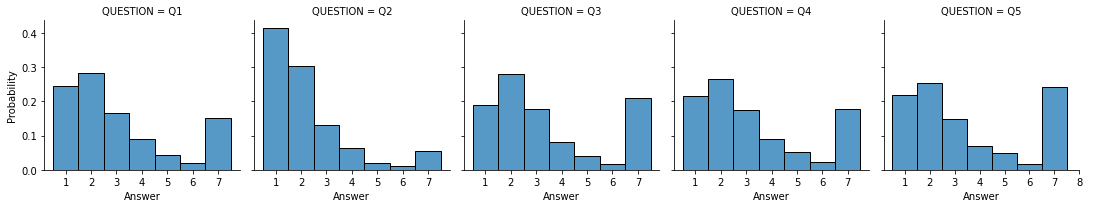

In [99]:
d = plot_data
g = sns.FacetGrid(d, col="QUESTION")
g.map(sns.histplot, "ANSWER", bins=np.arange(1,9)-0.5, stat="probability")#.set(xticklabels=[], xlabel="")
plt.xticks(np.arange(1,9))
g.add_legend()
g.set_xlabels("Answer")
g.set_ylabels("Probability")
plt.savefig(img_path + "question_answer_distribution.png")
plt.show()

## Analyse du CSI

Nous allons maintenant regarder la corrélation entre chaque questions. Ainsi que l'évolution du CSI durant ces dernières années, avec un découpage par région.

In [60]:
corr = raw_data[col["data"]].corr()
corr

,Q1,Q2,Q3,Q4,Q5
Q1,1.000000,0.269033,0.502409,0.437992,0.476009
Q2,0.269033,1.000000,0.296240,0.309871,0.302286
Q3,0.502409,0.296240,1.000000,0.624469,0.654127
Q4,0.437992,0.309871,0.624469,1.000000,0.592036
Q5,0.476009,0.302286,0.654127,0.592036,1.000000


On peut remarquer que les questions 3, 4 et 5 semble être plus corrélées entre elles que les autres questions. Ce qui se traduit par le fait que ces questions représentes plus ou moins la même variance du CSI.

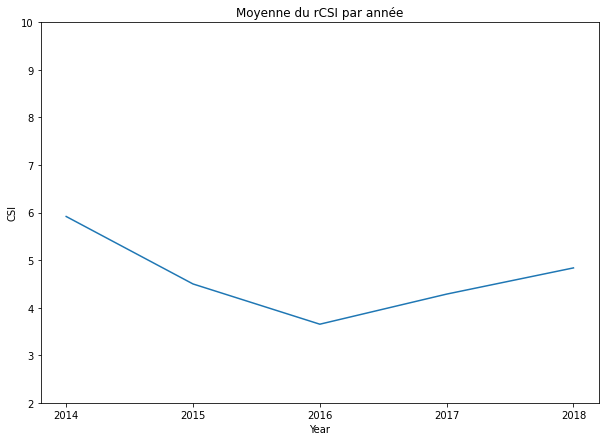

In [63]:
df = raw_data
years, by_year = [], []
for year in df.YEAR.unique():
    d = df[df.YEAR == year]
    by_year.append(d.CSI.mean())
    years.append(year)


plt.figure(figsize=(10,7))
sns.lineplot(x=years, y=by_year)
plt.ylim(2, 10)
plt.title("Moyenne du rCSI par année")
plt.xlabel("Year")
plt.ylabel("CSI")
plt.xticks(np.arange(2014, 2019, step=1))
plt.savefig(img_path + "csi_by_year.png")
plt.show()

On remarque que le CSI à grandement diminué de 2014 jusqu'en 2016 puis est remonté jusqu'a 2018. 

In [67]:
def mean_csi_by_geo(df, geo, filename=None):
    d = pd.DataFrame(raw_data.groupby(by=[geo]).CSI.mean()).reset_index()
    d = d.rename(columns={"index" : geo, d.columns[1] : "VALUE"})

    plt.figure(figsize=(30,7))
    
    sns.barplot(x=geo, y="VALUE", data=d, color="tab:blue")
    plt.xlabel(geo)
    plt.ylabel("Average rCSI")
    plt.ylim(0, 17)
    if filename is not None:
        filename = filename + '_' + geo + ".png"
        plt.savefig(filename)
    plt.show()

def csi_by_year(df, geo, filename=None):
    plt.figure(figsize=(15,7))

    for geo_val in df[geo].unique():
        years, by_year = [], []
        df_geo = df[df[geo] == geo_val]

        for year in df.YEAR.unique():
            d = df_geo[df_geo.YEAR == year]

            years.append(year)
            by_year.append(d.CSI.mean())

        sns.lineplot(x=years, y=by_year)

    plt.legend(bbox_to_anchor=(1,1), labels=plot_data[geo].unique())
    plt.title("Moyenne du CSI réduit par année par " + geo)
    plt.xlabel("Year")
    plt.ylabel("rCSI")
    plt.ylim(0, 17)
    plt.xticks(np.arange(2014, 2019, step=1))
    if filename is not None:
        filename = filename + '_' + geo + ".png"
        plt.savefig(filename)
    plt.show()

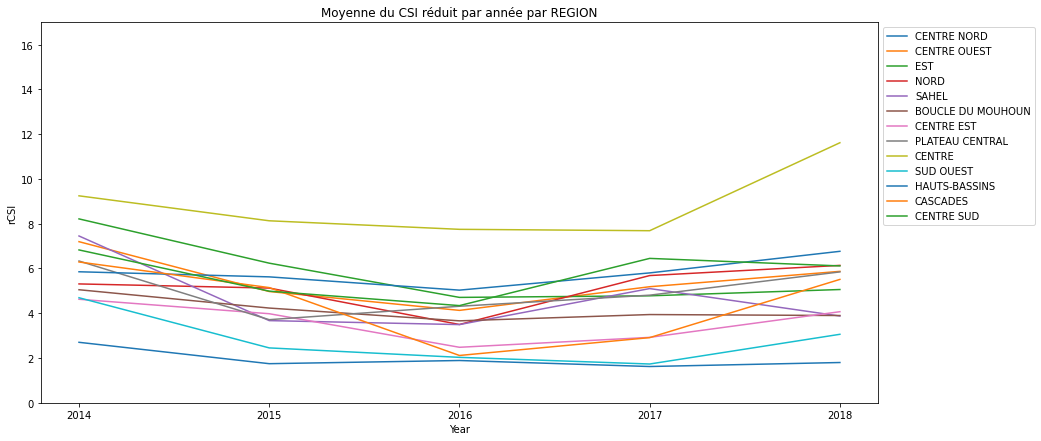

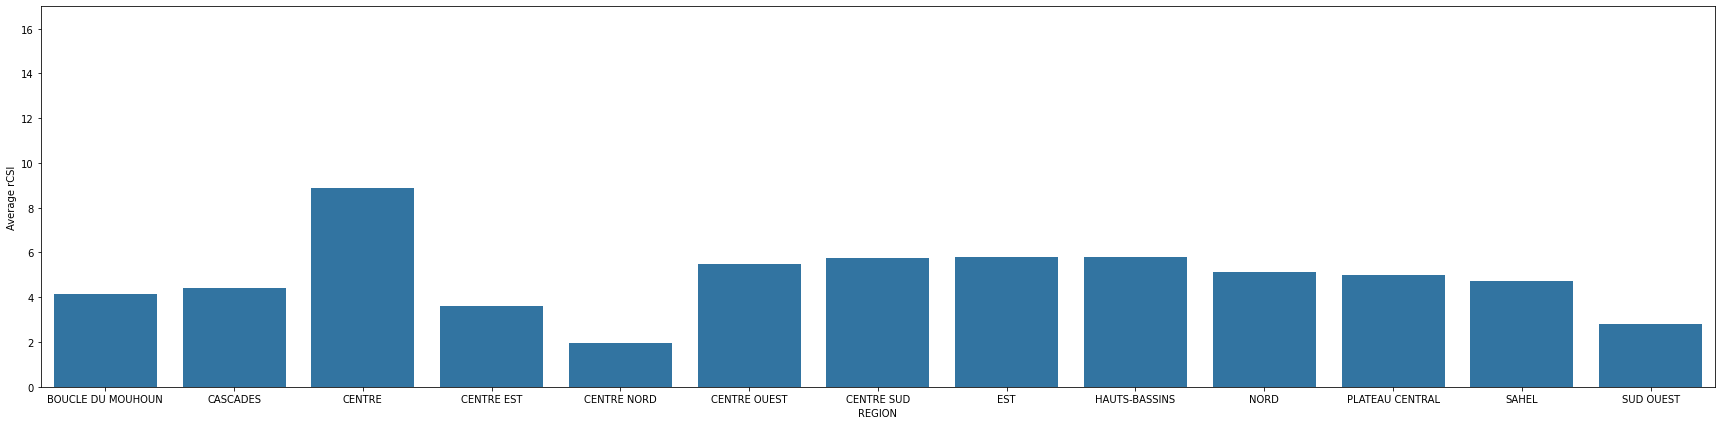

In [100]:
csi_by_year(plot_data, "REGION", img_path + "csi_by_year")
mean_csi_by_geo(plot_data, "REGION", img_path + "csi_by")